<a href="https://colab.research.google.com/github/bryantosin1/PCVK_WEEK7/blob/main/Jobsheet9_PCVK_2141720220.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Nama : Bryan Tosin Saputro
## NIM     : 214172020
## Kelas   : 3D / 13

#### Praktikum Filter

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
import cv2
import numpy as np
from matplotlib import pyplot as plt

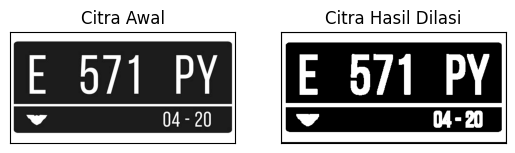

In [ ]:
def dilasi_citra(F,w):
  #size image
  p,q= F.shape

  imgD= np.zeros((p,q), dtype=np.uint8)
  #Generate structure element dilasi (SED)
  SED= np.ones((w,w), dtype=np.uint8)
  constant1= (w-1)//2

  #Proses Dilasi
  for i in range(constant1, p-constant1):
    for j in range(constant1,q-constant1):
      temp= F[i-constant1:i+constant1+1, j-constant1:j+constant1+1]
      product= temp*SED
      imgD[i,j]= np.max(product)
  return imgD

img_d= cv.imread('/content/drive/MyDrive/PCVK/plat2.jpg',0)
ret, thresh = cv2.threshold(img_d, 125, 200, cv2.THRESH_BINARY)
w=5
imgD = dilasi_citra(thresh,w)
plt.subplot(121),plt.imshow(img_d,cmap = 'gray')
plt.title('Citra Awal'), plt.xticks([]), plt.yticks([])
plt.subplot(122),plt.imshow(imgD,cmap = 'gray')
plt.title('Citra Hasil Dilasi'), plt.xticks([]), plt.yticks([])
plt.show()

[[1 1 1]
 [1 1 1]
 [1 1 1]]


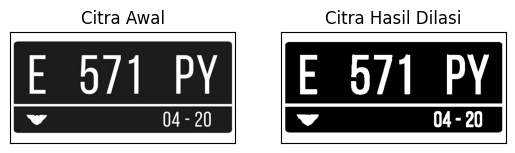

In [ ]:
img= cv.imread('/content/drive/MyDrive/PCVK/plat2.jpg',0)
ret, thresh = cv2.threshold(img, 127, 255, cv2.THRESH_BINARY)
kernel = np.ones((3,3),np.uint16)
dilasi = cv2.dilate(thresh,kernel,iterations = 1)
print(kernel)

plt.subplot(121),plt.imshow(img, cmap='gray'),plt.title('Citra Awal')
plt.xticks([]), plt.yticks([])
plt.subplot(122),plt.imshow(dilasi, cmap='gray'),plt.title('Citra Hasil Dilasi')
plt.xticks([]), plt.yticks([])
plt.show()

Sharpen

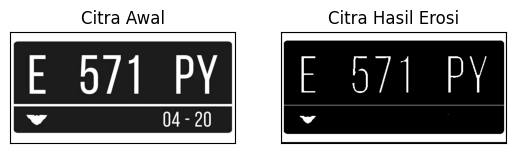

In [ ]:
#Erosi Tanpa Library
def erosi_citra(F,k):
  #size image
  m,n= F.shape
  #Generate structure element erosi (SE)
  SE= np.ones((k,k), dtype=np.uint8)
  constant= (k-1)//2
  imgE= np.zeros((m,n), dtype=np.uint8)
  #Proses Erosi
  for i in range(constant, m-constant):
    for j in range(constant,n-constant):
      temp= F[i-constant:i+constant+1, j-constant:j+constant+1]
      product= temp*SE
      imgE[i,j]= np.min(product)
  return imgE
img_e= cv2.imread('/content/drive/MyDrive/PCVK/plat2.jpg',0)
ret1, thresh1 = cv2.threshold(img_e, 175, 225, cv2.THRESH_BINARY)
k=5
imgE = erosi_citra(thresh1,k)

plt.subplot(121),plt.imshow(img_e,cmap = 'gray')
plt.title('Citra Awal'), plt.xticks([]), plt.yticks([])
plt.subplot(122),plt.imshow(imgE,cmap = 'gray')
plt.title('Citra Hasil Erosi'), plt.xticks([]),
plt.yticks([])
plt.show()

Emboss

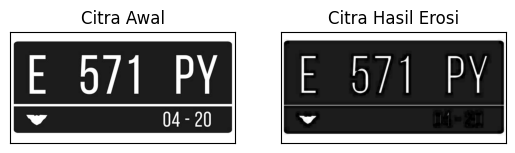

In [ ]:
#EROSI LIBRARY
img = cv2.imread('/content/drive/MyDrive/PCVK/plat2.jpg',0)
kernel = np.ones((5,5),np.uint8)
erosion = cv2.erode(img,kernel,iterations = 1)
plt.subplot(121),plt.imshow(img,cmap = 'gray'),plt.title('Citra Awal')
plt.xticks([]), plt.yticks([])
plt.subplot(122),plt.imshow(erosion,cmap = 'gray'),plt.title('Citra Hasil Erosi')
plt.xticks([]), plt.yticks([])
plt.show()

Left Sobel Edge Detection

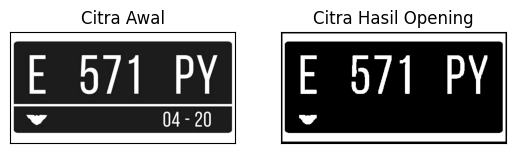

In [ ]:
img_o= cv2.imread('/content/drive/MyDrive/PCVK/plat2.jpg',0)
reto, thresho = cv2.threshold(img_o, 127, 225, cv2.THRESH_BINARY)
k=7
imgO = dilasi_citra(erosi_citra(thresho,k),k)

plt.subplot(121),plt.imshow(img_o,cmap = 'gray')
plt.title('Citra Awal'), plt.xticks([]), plt.yticks([])
plt.subplot(122),plt.imshow(imgO,cmap = 'gray')
plt.title('Citra Hasil Opening'), plt.xticks([]), plt.yticks([])
plt.show()

Canny Edge Detection

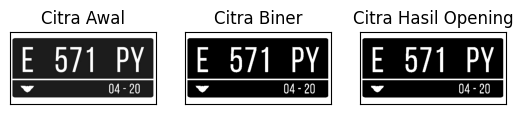

In [ ]:
#Dengan Menggunakan Library
img = cv2.imread('/content/drive/MyDrive/PCVK/plat2.jpg',0)
ret, thresh = cv2.threshold(img, 127, 225, cv2.THRESH_BINARY)
kernel = np.ones((3,3),np.uint8)
openn = cv2.morphologyEx(thresh,cv2.MORPH_OPEN, kernel)
plt.subplot(131),plt.imshow(img,cmap = 'gray')
plt.title('Citra Awal'), plt.xticks([]), plt.yticks([])
plt.subplot(132),plt.imshow(thresh,cmap = 'gray')
plt.title('Citra Biner'), plt.xticks([]), plt.yticks([])
plt.subplot(133),plt.imshow(openn,cmap = 'gray')
plt.title('Citra Hasil Opening'), plt.xticks([]),
plt.yticks([])
plt.show()

Prewitt Edge Detection

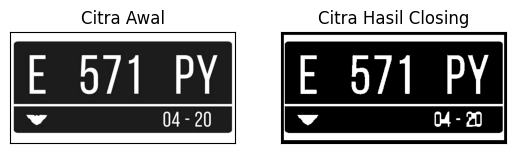

In [ ]:
img_c= cv2.imread('/content/drive/MyDrive/PCVK/plat2.jpg',0) #
retc, threshc = cv2.threshold(img_c, 127, 225, cv2.THRESH_BINARY)
k=7
imgC = erosi_citra(dilasi_citra(threshc,k),k)
plt.subplot(121),plt.imshow(img_c,cmap = 'gray')
plt.title('Citra Awal'), plt.xticks([]), plt.yticks([])
plt.subplot(122),plt.imshow(imgC,cmap = 'gray')
plt.title('Citra Hasil Closing'), plt.xticks([]),
plt.yticks([])
plt.show()

5 x 5 Gaussian Blur

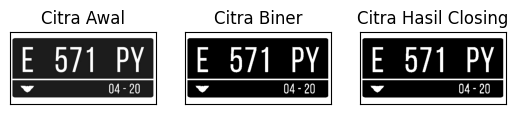

In [ ]:
img = cv2.imread('/content/drive/MyDrive/PCVK/plat2.jpg',0)
ret, thresh = cv2.threshold(img, 127, 225, cv2.THRESH_BINARY)
kernel = np.ones((3,3),np.uint8)
closs = cv2.morphologyEx(thresh,cv2.MORPH_CLOSE, kernel)
plt.subplot(131),plt.imshow(img,cmap = 'gray')
plt.title('Citra Awal'), plt.xticks([]), plt.yticks([])
plt.subplot(132),plt.imshow(thresh,cmap = 'gray')
plt.title('Citra Biner'), plt.xticks([]), plt.yticks([])
plt.subplot(133),plt.imshow(closs,cmap = 'gray')
plt.title('Citra Hasil Closing'), plt.xticks([]), plt.yticks([])
plt.show()

21 x 21 Gaussian Blur

SED = Cross 3


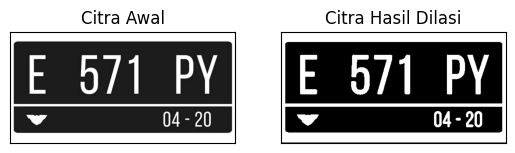

In [ ]:
def dilatasi_citra(F,f):
  p,q = F.shape

  imgD = np.zeros((p,q), dtype= np.uint8)
  SED = np.array([[0, 1, 0],
                  [1, 1, 1],
                  [0, 1, 0]], dtype = np.uint8)
  constant1= (f-1)//2
  #Proses Dilasi
  for i in range(constant1, p-constant1):
    for j in range(constant1,q-constant1):
      temp= F[i-constant1:i+constant1+1, j-constant1:j+constant1+1]
      product= temp*SED
      imgD[i,j]= np.max(product)
  return imgD

print('SED = Cross 3')
img_d= cv2.imread('/content/drive/MyDrive/PCVK/plat2.jpg',0)
ret, thresh = cv2.threshold(img_d, 127, 225, cv2.THRESH_BINARY)
f=3
imgD = dilatasi_citra(thresh,f)
plt.subplot(121),plt.imshow(img_d,cmap = 'gray')
plt.title('Citra Awal'), plt.xticks([]), plt.yticks([])
plt.subplot(122),plt.imshow(imgD,cmap = 'gray')
plt.title('Citra Hasil Dilasi'), plt.xticks([]),
plt.yticks([])
plt.show()

## Tugas


SED = Cross 5


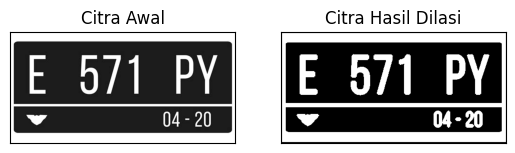

In [ ]:
def dilasi_citra(F,w):
  #size image
  p,q= F.shape
  imgF= np.zeros((p,q), dtype=np.uint8)
  #Generate structure element dilasi (SED)
  # SED= np.ones((w,w), dtype=np.uint8)
  SED = np.array([[0, 0, 1, 0, 0],
                  [0, 0, 1, 0, 0],
                  [1, 1, 1, 1, 1],
                  [0, 0, 1, 0, 0],
                  [0, 0, 1, 0, 0]], dtype = np.uint8)
  constant1= (w-1)//2
  #Proses Dilasi
  for i in range(constant1, p-constant1):
    for j in range(constant1,q-constant1):
      temp= F[i-constant1:i+constant1+1, j-constant1:j+constant1+1]
      product= temp*SED
      imgF[i,j]= np.max(product)
  return imgF


print('SED = Cross 5')
img_d= cv2.imread('/content/drive/MyDrive/PCVK/plat2.jpg',0)
ret, thresh = cv2.threshold(img_d, 127, 225, cv2.THRESH_BINARY)
w=5
imgF = dilasi_citra(thresh,w)

plt.subplot(121),plt.imshow(img_d,cmap = 'gray')
plt.title('Citra Awal'), plt.xticks([]), plt.yticks([])
plt.subplot(122),plt.imshow(imgF,cmap = 'gray')
plt.title('Citra Hasil Dilasi'), plt.xticks([]),
plt.yticks([])
plt.show()

SED = Circle 3


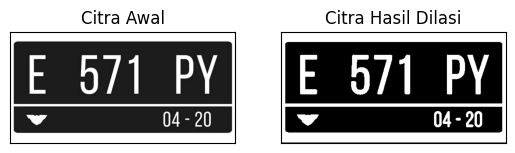

SED = Circle 5


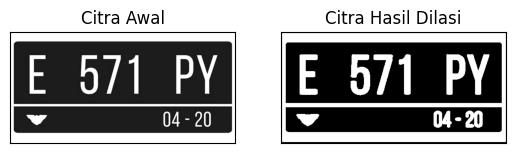

In [ ]:
#Dilasi Circular SED
def dilasi_citra(F,w):
  #size image
  p,q= F.shape
  imgD= np.zeros((p,q), dtype=np.uint8)
  #Generate structure element dilasi (SED)
  SED= cv2.getStructuringElement(cv2.MORPH_ELLIPSE,(w,w))
  constant1= (w-1)//2
  #Proses Dilasi
  for i in range(constant1, p-constant1):
    for j in range(constant1,q-constant1):
      temp= F[i-constant1:i+constant1+1, j-constant1:j+constant1+1]
      product= temp*SED
      imgD[i,j]= np.max(product)
  return imgD
print('SED = Circle 3')
img_d= cv2.imread('/content/drive/MyDrive/PCVK/plat2.jpg',0)
ret, thresh = cv2.threshold(img_d, 127, 225, cv2.THRESH_BINARY)
w=3
imgD = dilasi_citra(thresh,w)

plt.subplot(121),plt.imshow(img_d,cmap = 'gray')
plt.title('Citra Awal'), plt.xticks([]), plt.yticks([])
plt.subplot(122),plt.imshow(imgD,cmap = 'gray')
plt.title('Citra Hasil Dilasi'), plt.xticks([]),
plt.yticks([])
plt.show()
print('SED = Circle 5')

img_d= cv2.imread('/content/drive/MyDrive/PCVK/plat2.jpg',0)
ret, thresh = cv2.threshold(img_d, 127, 225, cv2.THRESH_BINARY)
w=5
imgD = dilasi_citra(thresh,w)
plt.subplot(121),plt.imshow(img_d,cmap = 'gray')
plt.title('Citra Awal'), plt.xticks([]), plt.yticks([])
plt.subplot(122),plt.imshow(imgD,cmap = 'gray')
plt.title('Citra Hasil Dilasi'), plt.xticks([]),
plt.yticks([])
plt.show()

SE = Rectangle 3x5


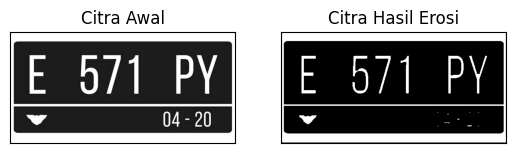

SE = Rectangle 5x7


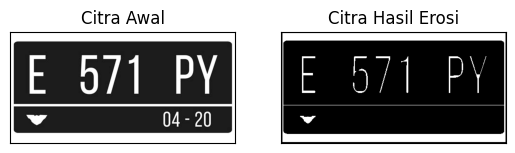

In [ ]:
#Erosi Cross SE
def erosi_citra(F,p,l):
  #size image
  m,n= F.shape
  #Generate structure element erosi (SE)
  SE = cv2.getStructuringElement(cv2.MORPH_RECT,(p,l))
  constant1= (l-1)//2
  constant2= (p-1)//2
  # print(SE)
  imgE= np.zeros((m,n), dtype=np.uint8)
  #Proses Erosi
  for i in range(constant1, m-constant1):
    for j in range(constant2,n-constant2):
      temp= F[i-constant1:i+constant1+1, j-constant2:j+constant2+1]
      product= temp*SE
      imgE[i,j]= np.min(product)
  return imgE

print('SE = Rectangle 3x5')
img_e= cv2.imread('/content/drive/MyDrive/PCVK/plat2.jpg',0) #
ret1, thresh1 = cv2.threshold(img_e, 127, 225, cv2.THRESH_BINARY)
p=5
l=3
imgE = erosi_citra(thresh1,p,l)
plt.subplot(121),plt.imshow(img_e,cmap = 'gray')
plt.title('Citra Awal'), plt.xticks([]), plt.yticks([])
plt.subplot(122),plt.imshow(imgE,cmap = 'gray')
plt.title('Citra Hasil Erosi'), plt.xticks([]), plt.yticks([])
plt.show()
print('SE = Rectangle 5x7')

img_e= cv2.imread('/content/drive/MyDrive/PCVK/plat2.jpg',0) #
ret1, thresh1 = cv2.threshold(img_e, 127, 225, cv2.THRESH_BINARY)
p=7
l=5
imgE = erosi_citra(thresh1,p,l)
plt.subplot(121),plt.imshow(img_e,cmap = 'gray')
plt.title('Citra Awal'), plt.xticks([]), plt.yticks([])
plt.subplot(122),plt.imshow(imgE,cmap = 'gray')
plt.title('Citra Hasil Erosi'), plt.xticks([]), plt.yticks([])
plt.show()

SE = Line Vertikal 3


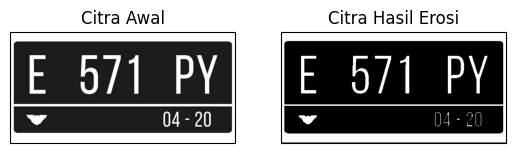

SE = Line Vertikal 5


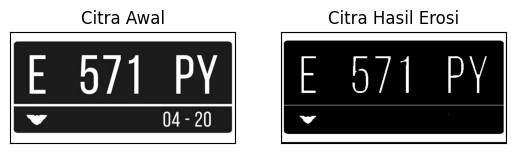

In [ ]:
#Erosi Line Vertikal SE
def erosi_citra(F,k):
  #size image
  m,n= F.shape
  #Generate structure element erosi (SE)
  SE = cv2.getStructuringElement(cv2.MORPH_ELLIPSE,(1,k))
  constant= (k-1)//2
  imgE= np.zeros((m,n), dtype=np.uint8)
  #Proses Erosi
  for i in range(constant, m-constant):
    for j in range(constant,n-constant):
      temp= F[i-constant:i+constant+1, j-constant:j+constant+1]
      product= temp*SE
      imgE[i,j]= np.min(product)
  return imgE

print('SE = Line Vertikal 3')
img_e= cv2.imread('/content/drive/MyDrive/PCVK/plat2.jpg',0) #
ret1, thresh1 = cv2.threshold(img_e, 127, 225,
cv2.THRESH_BINARY)
k=3
imgE = erosi_citra(thresh1,k)
plt.subplot(121),plt.imshow(img_e,cmap = 'gray')
plt.title('Citra Awal'), plt.xticks([]), plt.yticks([])
plt.subplot(122),plt.imshow(imgE,cmap = 'gray')
plt.title('Citra Hasil Erosi'), plt.xticks([]),
plt.yticks([])
plt.show()
print('SE = Line Vertikal 5')

img_e= cv2.imread('/content/drive/MyDrive/PCVK/plat2.jpg',0) #
ret1, thresh1 = cv2.threshold(img_e, 127, 225, cv2.THRESH_BINARY)
k=5
imgE = erosi_citra(thresh1,k)
plt.subplot(121),plt.imshow(img_e,cmap = 'gray')
plt.title('Citra Awal'), plt.xticks([]), plt.yticks([])
plt.subplot(122),plt.imshow(imgE,cmap = 'gray')
plt.title('Citra Hasil Erosi'), plt.xticks([]),
plt.yticks([])
plt.show()

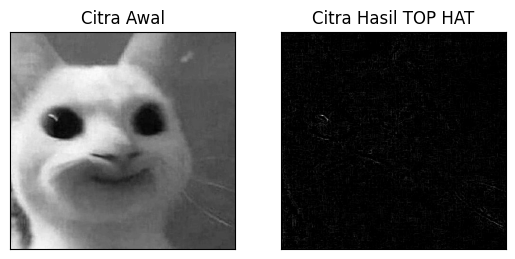

In [ ]:
# Getting the kernel to be used in Top-Hat
filterSize =(3, 3)
kernel = cv2.getStructuringElement(cv2.MORPH_RECT, filterSize)
# Reading the image named 'input.jpg'
img = cv2.imread('/content/drive/MyDrive/PCVK/kitten01.jpg')
input_image = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
# Applying the Top-Hat operation
tophat_img = cv2.morphologyEx(input_image, cv2.MORPH_TOPHAT, kernel)
#cv2.imshow("original", input_image)
#cv2.imshow("tophat", tophat_img)
#cv2.waitKey(5000)
plt.subplot(121),plt.imshow(input_image,cmap = 'gray')
plt.title('Citra Awal'), plt.xticks([]), plt.yticks([])
plt.subplot(122),plt.imshow(tophat_img,cmap = 'gray')
plt.title('Citra Hasil TOP HAT'), plt.xticks([]), plt.yticks([])
plt.show()

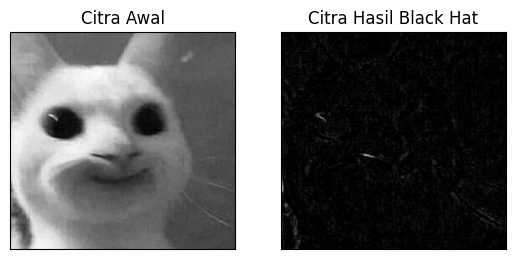

In [ ]:
filterSize =(3, 3)
kernel = cv2.getStructuringElement(cv2.MORPH_RECT, filterSize)
# Reading the image named 'input.jpg'
img = cv2.imread('/content/drive/MyDrive/PCVK/kitten01.jpg')
img = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
# Applying the Black-Hat operation
#tophat_img = cv2.morphologyEx(img,cv2.MORPH_BLACKHAT, kernel)
Kernel = cv2.getStructuringElement(cv2.MORPH_RECT, (13, 5))
blackhat = cv2.morphologyEx(img, cv2.MORPH_BLACKHAT, Kernel)
#cv2.imshow("original", input_image)
#cv2.imshow("tophat", tophat_img)
#cv2.waitKey(5000)
plt.subplot(121),plt.imshow(img,cmap = 'gray')
plt.title('Citra Awal'), plt.xticks([]), plt.yticks([])
plt.subplot(122),plt.imshow(blackhat,cmap = 'gray')
plt.title('Citra Hasil Black Hat'), plt.xticks([]), plt.yticks([])
plt.show()

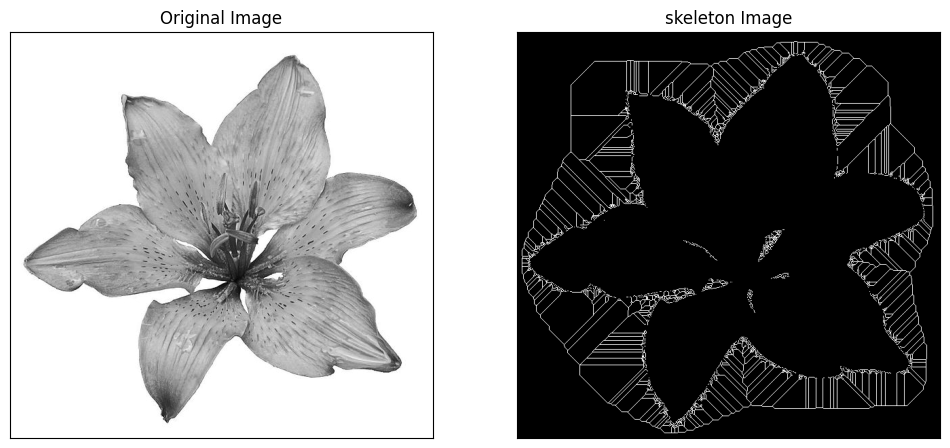

In [ ]:
import cv2 as cv
from skimage import filters
from skimage.morphology import skeletonize
# read image
img = cv.imread('/content/drive/MyDrive/PCVK/lily.jpg',0)
binary = img > filters.threshold_triangle(img)
# true false to one
binary_cp = binary.copy()
binary_cp[binary_cp == True] = 1
binary_cp[binary_cp == False] = 0
# skeletonize image
skeleton = skeletonize(binary_cp)
# print images
plt.figure(figsize=(12,12))
plt.subplot(121),plt.imshow(img,cmap = 'gray')
plt.title('Original Image'), plt.xticks([]), plt.yticks([])
plt.subplot(122),plt.imshow(skeleton,cmap = 'gray')
plt.title('skeleton Image'), plt.xticks([]), plt.yticks([])
plt.savefig("binary and bin_skeleton.png")
plt.show()

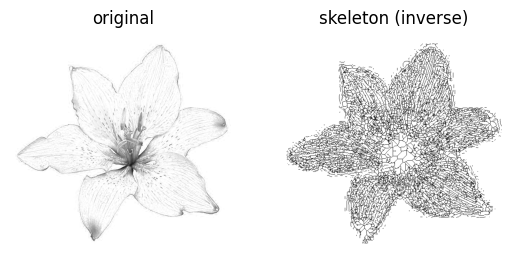

In [ ]:
from skimage import io

# read image
img = io.imread('/content/drive/MyDrive/PCVK/lily.jpg')[...,0]
# Note: we want the black bits to be True, so use <
binary = img < filters.threshold_triangle(img)
# skeletonize image
skeleton = skeletonize(binary)
# print images
fig, ax = plt.subplots(1, 2)
ax[0].imshow(img, cmap='gray')
ax[0].set_title('original')
ax[0].set_axis_off()
# note the reversed colormap, gray_r
ax[1].imshow(skeleton, cmap='gray_r')
ax[1].set_title('skeleton (inverse)')
ax[1].set_axis_off()
plt.show()

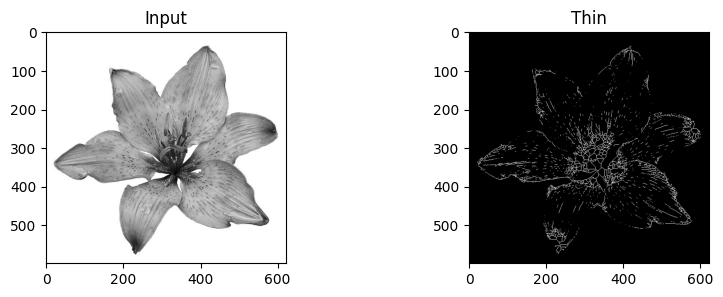

In [ ]:
from skimage import img_as_float
from skimage import io, color, morphology

image = img_as_float(color.rgb2gray(io.imread('/content/drive/MyDrive/PCVK/lily.jpg')))
image_binary = image < 0.5
out_skeletonize = morphology.skeletonize(image_binary)
out_thin = morphology.thin(image_binary)
f, (ax0, ax1) = plt.subplots(1, 2, figsize=(10, 3))
ax0.imshow(image, cmap='gray')
ax0.set_title('Input')
ax1.imshow(out_thin, cmap='gray')
ax1.set_title('Thin')
plt.show()

In [ ]:
import numpy as np
import cv2
import math
from google.colab.patches import cv2_imshow
from PIL import Image as im

def convolution2d(image, kernel, stride, padding):

  image = np.pad(image, padding, mode='constant', constant_values=0)

  kernel_height, kernel_width = kernel.shape
  padded_height, padded_width = image.shape

  output_height = (padded_height - kernel_height) // stride + 1
  output_width = (padded_width - kernel_width) // stride + 1

  new_image = np.zeros((output_height, output_width)).astype(np.float32)

  # convolution process
  for y in range(0, output_height):
    for x in range(0, output_width):
      new_image[y][x] = np.sum(image[y * stride:y * stride + kernel_height, x * stride:x * stride + kernel_width] * kernel).astype(np.float32)

  return new_image

kernel_sharpen = np.array([[0,-1,0],
                           [-1,5,-1],
                           [0,-1,0]])
conv
def Brightness (image, brightness):
  brightness_image = np.zeros(image.shape, image.dtype)

  for y in range(image.shape[0]):
    for x in range(image.shape[1]):
      for c in range(image.shape[2]):
        brightness_image[y,x,c] = np.clip(image[y,x,c] + brightness, 0, 255)

  return brightness_image

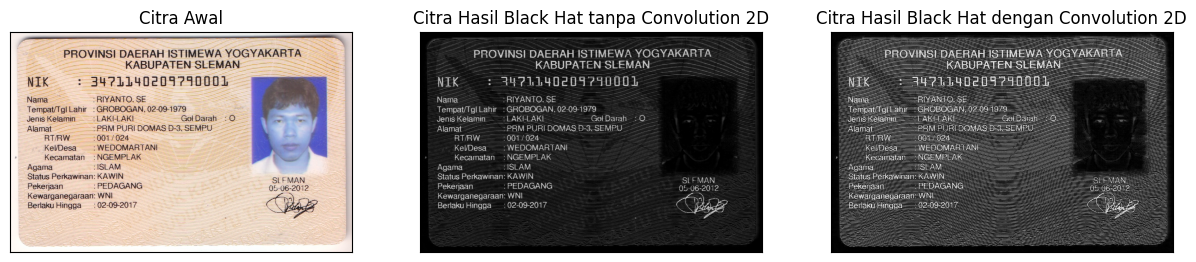

In [ ]:
filterSize =(3, 3)
kernel = cv2.getStructuringElement(cv2.MORPH_RECT, filterSize)

# Reading the image named 'input.jpg'
image = cv2.imread('/content/drive/MyDrive/PCVK/ktp/ktp.png')

# Histogram
# brightness = Brightness(image, -10)
result = cv2.filter2D(image, -1, kernel_sharpen)
img1 = cv2.cvtColor(result, cv2.COLOR_BGR2GRAY)
img2 = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)

Kernel = cv2.getStructuringElement(cv2.MORPH_RECT, (13, 5))
blackhat = cv2.morphologyEx(img1, cv2.MORPH_BLACKHAT, Kernel)
blackhat2 = cv2.morphologyEx(img2, cv2.MORPH_BLACKHAT, Kernel)

plt.figure(figsize=(15,30))
plt.subplot(131),plt.imshow(image,cmap = 'gray')
plt.title('Citra Awal'), plt.xticks([]), plt.yticks([])
plt.subplot(132),plt.imshow(blackhat2,cmap = 'gray')
plt.title('Citra Hasil Black Hat tanpa Convolution 2D'), plt.xticks([]), plt.yticks([])
plt.subplot(133),plt.imshow(blackhat,cmap = 'gray')
plt.title('Citra Hasil Black Hat dengan Convolution 2D'), plt.xticks([]), plt.yticks([])
plt.show()

In [ ]:
def conv2d(image, kernel, stride):

  height, width = image.shape[0], image.shape[1]
  kernel_height, kernel_width = kernel.shape[0], kernel.shape[1]

  start = int(kernel_width/2)

  image_result = np.copy(image)

  for y in range(start, height - start, stride):
    for x in range(start, width - start, stride):
      value = 0

      for ky in range(kernel_height):
        for kx in range(kernel_width):
          i = y - start + ky
          j = x - start + kx

          value += image[i, j] * kernel[ky, kx]

      image_result[y, x] = np.clip(value, 0, 255)

    return image_result

def Brightness (image, brightness):
  brightness_image = np.zeros(image.shape, image.dtype)

  for y in range(image.shape[0]):
    for x in range(image.shape[1]):
      for c in range(image.shape[2]):
        brightness_image[y,x,c] = np.clip(image[y,x,c] + brightness, 0, 255)

  return brightness_image

kernel_sharpen = np.array([[0, -1, 0],
                          [-1, 5, -1],
                          [0, -1, 0]], dtype = np.float32)

[[1]
 [1]]


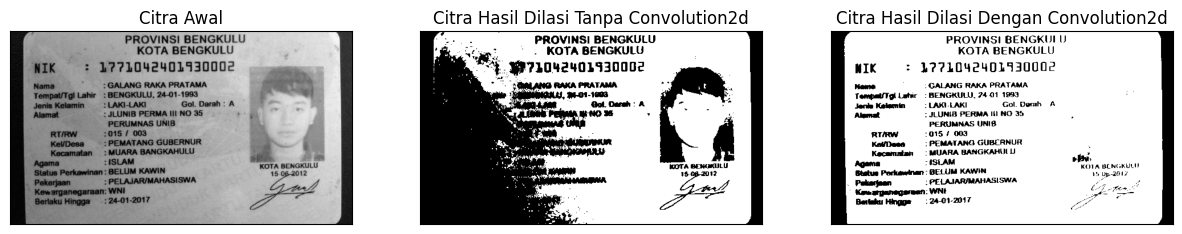

In [ ]:
img = cv2.imread('/content/drive/MyDrive/PCVK/ktp/ktp1.png')
input = cv.cvtColor(img, cv.COLOR_BGR2GRAY)

ret, thresh = cv2.threshold(input, 127, 255, cv2.THRESH_BINARY)
kernel = np.ones((2,1),np.uint16)
dilasi = cv2.dilate(thresh,kernel,iterations = 1)

result = conv2d(img, kernel_sharpen,1)
brightness = Brightness(result, 35)
input2 = cv.cvtColor(brightness, cv.COLOR_BGR2GRAY)

ret2, thresh2 = cv2.threshold(input2, 127, 255, cv2.THRESH_BINARY + cv2.THRESH_OTSU)

# kernel2 = np.ones((5,5),np.uint8)
# erosion = cv2.erode(thresh2,kernel2,iterations = 1)

kernel2 = np.ones((2,1),np.uint16)
dilasi2 = cv2.dilate(thresh2,kernel2,iterations = 1)

# kernel2 = np.ones((2,1),np.uint8)
# closs = cv2.morphologyEx(thresh2,cv2.MORPH_CLOSE, kernel)

print(kernel)

plt.figure(figsize=(15,13))
plt.subplot(131),plt.imshow(input, cmap='gray'),plt.title('Citra Awal')
plt.xticks([]), plt.yticks([])
plt.subplot(132),plt.imshow(dilasi, cmap='gray'),plt.title('Citra Hasil Dilasi Tanpa Convolution2d')
plt.xticks([]), plt.yticks([])
plt.subplot(133),plt.imshow(dilasi2, cmap='gray'),plt.title('Citra Hasil Dilasi Dengan Convolution2d')
plt.xticks([]), plt.yticks([])
plt.show()

[[1]
 [1]]


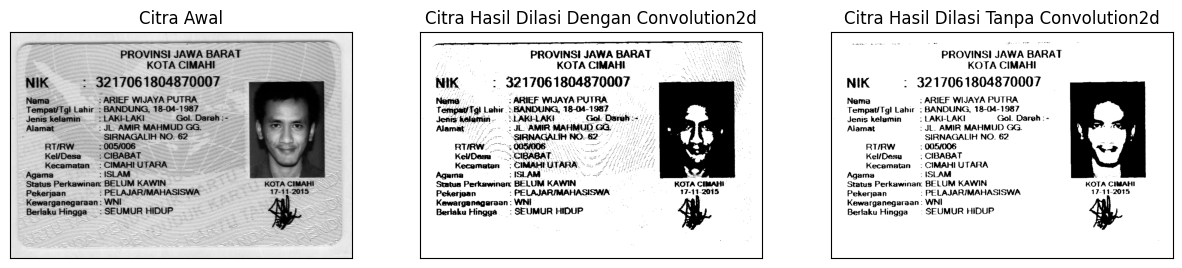

In [ ]:
img = cv2.imread('/content/drive/MyDrive/PCVK/ktp/ktp2.png')

kernel_lsed = np.array([[1, 0, -1],
                          [2, 0, -3],
                          [1, 0, -2]], dtype=np.float32)

# cv2_imshow(ktp3)
result = conv2d(img, kernel_lsed,1)
brightness = Brightness(result, -35)

input = cv.cvtColor(brightness, cv.COLOR_BGR2GRAY)

ret, thresh = cv2.threshold(input, 127, 255, cv2.THRESH_BINARY)
kernel = np.ones((2,1),np.uint16)
dilasi = cv2.dilate(thresh,kernel,iterations = 1)


input2 = cv.cvtColor(img, cv.COLOR_BGR2GRAY)

ret2, thresh2 = cv2.threshold(input2, 127, 255, cv2.THRESH_BINARY)
kernel2 = np.ones((2,1),np.uint16)
dilasi2 = cv2.dilate(thresh2,kernel2,iterations = 1)

print(kernel)
plt.figure(figsize=(15,13))
plt.subplot(131),plt.imshow(input, cmap='gray'),plt.title('Citra Awal')
plt.xticks([]), plt.yticks([])
plt.subplot(132),plt.imshow(dilasi, cmap='gray'),plt.title('Citra Hasil Dilasi Dengan Convolution2d')
plt.xticks([]), plt.yticks([])
plt.subplot(133),plt.imshow(dilasi2, cmap='gray'),plt.title('Citra Hasil Dilasi Tanpa Convolution2d')
plt.xticks([]), plt.yticks([])
plt.show()

Gray Image


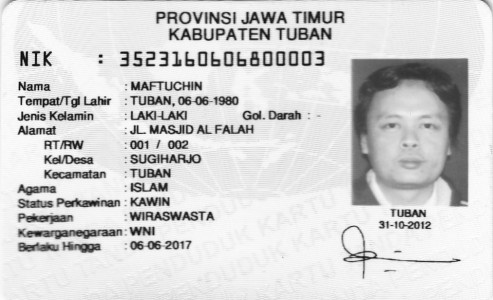

Final Image


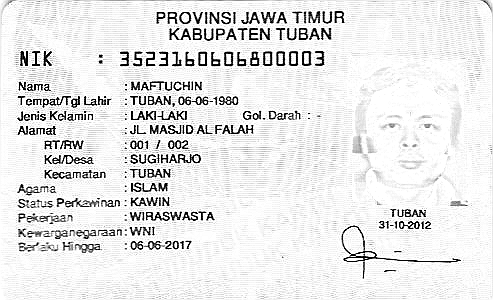

In [ ]:
from google.colab.patches import cv2_imshow

def convolution2d(image, kernel):
    tinggi = image.shape[0]
    lebar = image.shape[1]

    tinggi_kernel = kernel.shape[0]
    lebar_kernel = kernel.shape[1]

    start = int(lebar_kernel/2)

    image_result = np.copy(image)

    for y in range(start, tinggi - start):
        for x in range(start, lebar - start):
            value = 0

            for ky in range(tinggi_kernel):
                for kx in range(lebar_kernel):
                    i = y - start + ky
                    j = x - start + kx

                    value += image[i, j] * kernel[ky, kx]

            image_result[y, x] = np.clip(value, 0, 255)

    return image_result

img = cv2.imread('/content/drive/MyDrive/PCVK/ktp/ktp4.png', 0)

Kernel = cv2.getStructuringElement(cv2.MORPH_RECT, (13, 5))
blackhat = cv2.morphologyEx(img, cv2.MORPH_BLACKHAT, Kernel)

inverted_image = cv2.bitwise_not(blackhat)

kernel_sharpen = np.array([[0, -1, 0],
                          [-1, 5, -1],
                          [0, -1, 0]])

result_image = convolution2d(inverted_image, kernel_sharpen)

print('Gray Image')
cv2_imshow(img)

print('Final Image')
cv2_imshow(result_image)

Gray Image


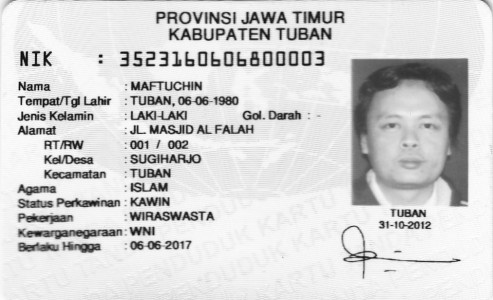

Final Image


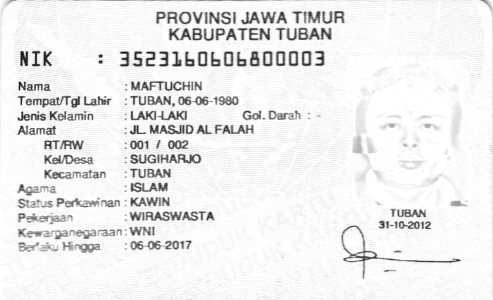

In [ ]:
img = cv2.imread('/content/drive/MyDrive/PCVK/ktp/ktp4.png', 0)

Kernel = cv2.getStructuringElement(cv2.MORPH_RECT, (13, 5))
blackhat = cv2.morphologyEx(img, cv2.MORPH_BLACKHAT, Kernel)

inverted_image = cv2.bitwise_not(blackhat)

print('Gray Image')
cv2_imshow(img)

print('Final Image')
cv2_imshow(inverted_image)

In [ ]:
def Brightness(image, brightness):
    brightness_image = np.clip(image + brightness, 0, 255)
    return brightness_image

def conv2d(image, kernel, stride):
    height, width = image.shape[0], image.shape[1]
    kernel_height, kernel_width = kernel.shape[0], kernel.shape[1]

    start = int(kernel_width / 2)

    image_result = np.copy(image)

    for y in range(start, height - start, stride):
        for x in range(start, width - start, stride):
            value = 0

            for ky in range(kernel_height):
                for kx in range(kernel_width):
                    i = y - start + ky
                    j = x - start + kx

                    value += image[i, j] * kernel[ky, kx]

            image_result[y, x] = np.clip(value, 0, 255)

    return image_result

kernel_sharpen = np.array([[0, -1, 0],
                          [-1, 5, -1],
                          [0, -1, 0]], dtype=np.float32)

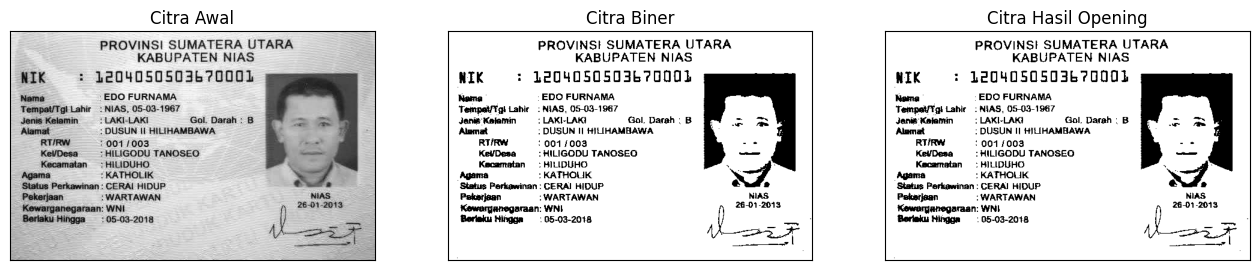

In [ ]:
img = cv2.imread('/content/drive/MyDrive/PCVK/ktp/ktp5.png', 0)

kernel_size = 21
sigma = math.sqrt(kernel_size)
gaussian_kernel = cv2.getGaussianKernel(kernel_size, sigma)
gauss_kernel = gaussian_kernel @ gaussian_kernel.transpose()

result = conv2d(img, gauss_kernel, 1)
brightness = Brightness(result, -30)

# operasi opening dengan library morphology
ret, thresh = cv2.threshold(img, 127, 255, cv2.THRESH_BINARY)
kernel = np.ones((1, 1), np.uint8)
openn = cv2.morphologyEx(thresh, cv2.MORPH_OPEN, kernel)

plt.figure(figsize=(16, 8))
plt.subplot(131), plt.imshow(img, cmap='gray')
plt.title('Citra Awal'), plt.xticks([]), plt.yticks([])
plt.subplot(132), plt.imshow(thresh, cmap='gray')
plt.title('Citra Biner'), plt.xticks([]), plt.yticks([])
plt.subplot(133), plt.imshow(openn, cmap='gray')
plt.title('Citra Hasil Opening'), plt.xticks([]), plt.yticks([])

plt.show()

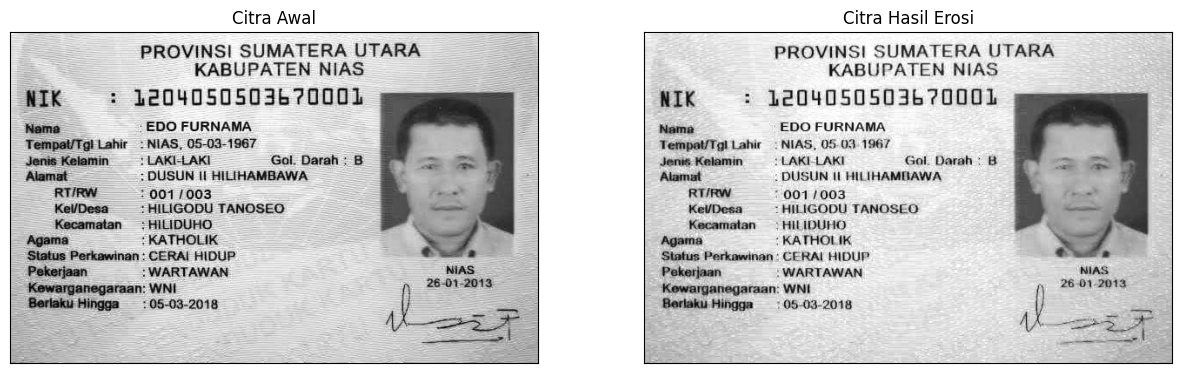

In [ ]:
#EROSI LIBRARY
img = cv2.imread('/content/drive/MyDrive/PCVK/ktp/ktp5.png', cv.IMREAD_GRAYSCALE)

kernel = np.ones((2,1),np.uint8)
erosion = cv2.dilate(img,kernel,iterations = 1)
plt.figure(figsize=(15,13))
plt.subplot(121),plt.imshow(img, cmap='gray'),plt.title('Citra Awal')
plt.xticks([]), plt.yticks([])
plt.subplot(122),plt.imshow(erosion, cmap='gray'),plt.title('Citra Hasil Erosi')
plt.xticks([]), plt.yticks([])
plt.show()

Hasil terbaik ditemukan pada operasi morfologi clossing dengan kernel 1x1


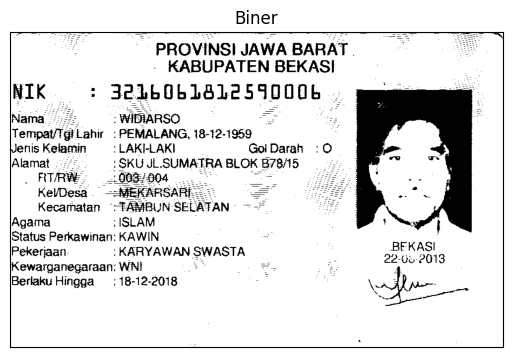

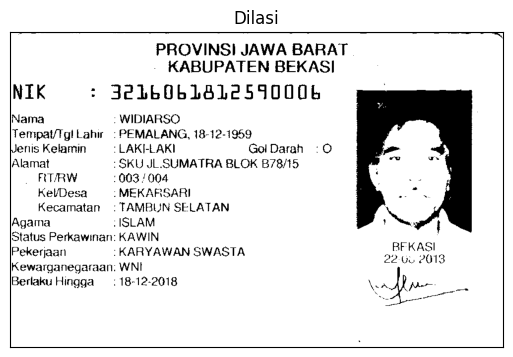

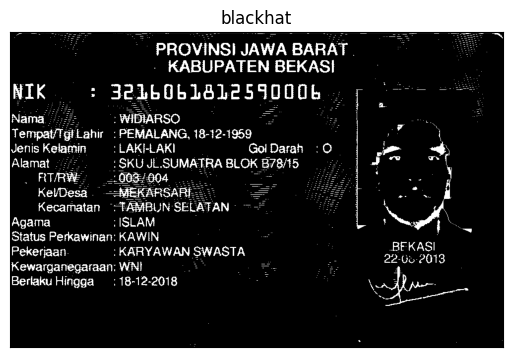

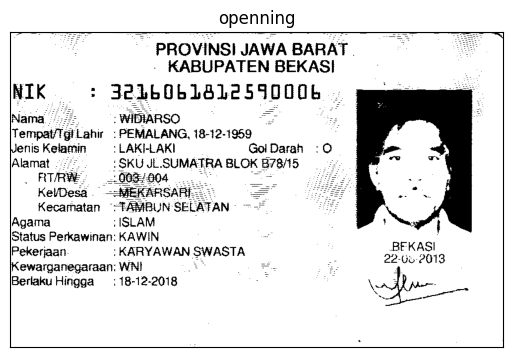

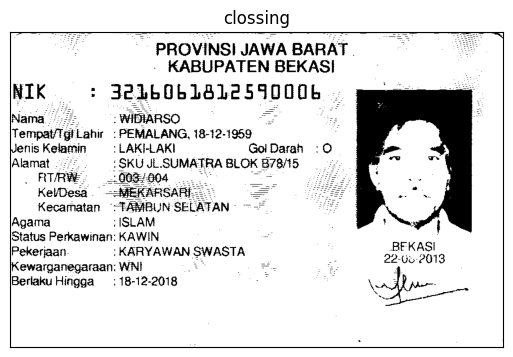

In [ ]:
import cv2
import numpy as np

img = cv2.imread('/content/drive/MyDrive/PCVK/ktp/ktp6.png')
gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
_, binary = cv2.threshold(gray, 0, 255, cv2.THRESH_BINARY + cv2.THRESH_OTSU)

kernel = np.ones((1,1),np.uint8)
close = cv2.morphologyEx(binary,cv2.MORPH_CLOSE, kernel)
kernel = np.ones((2,1),np.uint8)
dilasi = cv2.dilate(binary,kernel,iterations = 1)
Kernel = cv2.getStructuringElement(cv2.MORPH_RECT, (20, 17))
blackhat = cv2.morphologyEx(binary, cv2.MORPH_BLACKHAT, Kernel)
kernel = np.ones((1,1),np.uint8)
open = cv2.morphologyEx(binary,cv2.MORPH_OPEN, kernel)

print("Hasil terbaik ditemukan pada operasi morfologi clossing dengan kernel 1x1")

plt.figure(figsize=(14,6))
plt.subplot(121)
plt.imshow(binary, cmap='gray')
plt.title('Biner')
plt.xticks([]), plt.yticks([])
plt.show()

plt.figure(figsize=(14,6))
plt.subplot(122)
plt.imshow(dilasi,cmap = 'gray')
plt.title('Dilasi')
plt.xticks([]), plt.yticks([])
plt.show()

plt.figure(figsize=(14,6))
plt.subplot(121)
plt.imshow(blackhat,cmap = 'gray')
plt.title('blackhat')
plt.xticks([]), plt.yticks([])
plt.show()

plt.figure(figsize=(14,6))
plt.subplot(122)
plt.imshow(open,cmap = 'gray')
plt.title('openning')
plt.xticks([]), plt.yticks([])
plt.show()

plt.figure(figsize=(14,6))
plt.subplot(121)
plt.imshow(close,cmap = 'gray')
plt.title('clossing')
plt.xticks([]), plt.yticks([])
plt.show()

Hasil terbaik ditemukan pada operasi morfologi dilasi dengan kernel 2x1


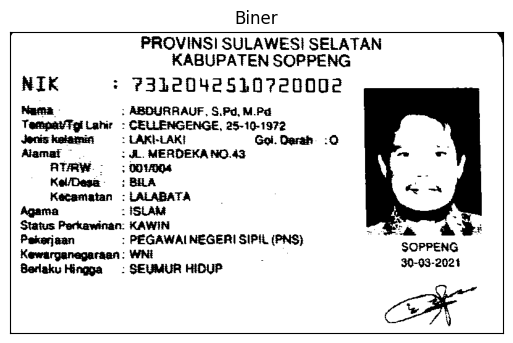

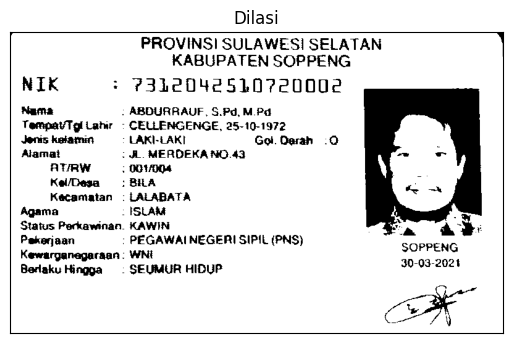

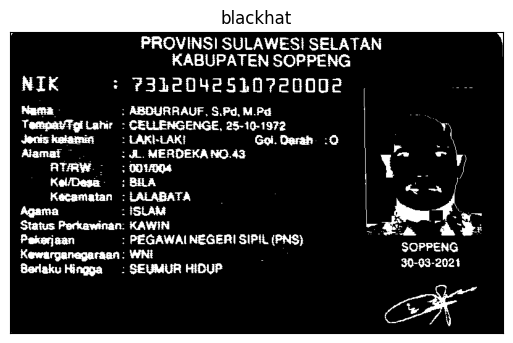

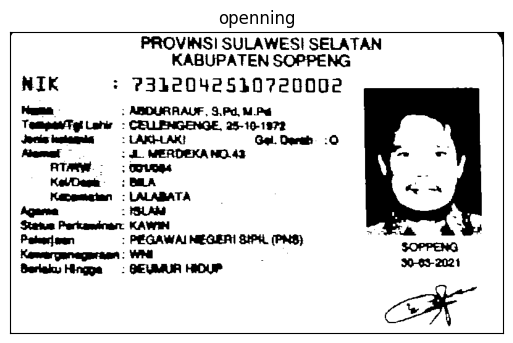

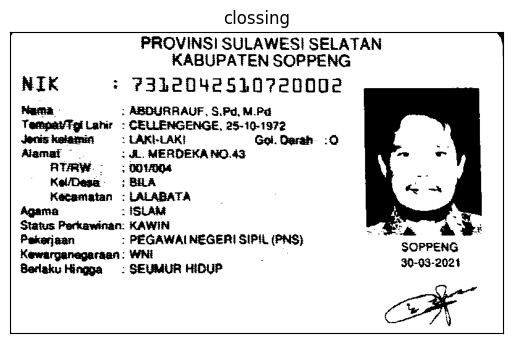

In [ ]:
import cv2
import numpy as np

img = cv2.imread('/content/drive/MyDrive/PCVK/ktp/KTP7.jpeg')
gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
_, binary = cv2.threshold(gray, 0, 255, cv2.THRESH_BINARY + cv2.THRESH_OTSU)

kernel = np.ones((1,1),np.uint8)
close = cv2.morphologyEx(binary,cv2.MORPH_CLOSE, kernel)
kernel = np.ones((2,1),np.uint8)
dilasi = cv2.dilate(binary,kernel,iterations = 1)
Kernel = cv2.getStructuringElement(cv2.MORPH_RECT, (20, 17))
blackhat = cv2.morphologyEx(binary, cv2.MORPH_BLACKHAT, Kernel)
kernel = np.ones((0,0),np.uint8)
open = cv2.morphologyEx(binary,cv2.MORPH_OPEN, kernel)

print("Hasil terbaik ditemukan pada operasi morfologi dilasi dengan kernel 2x1")

plt.figure(figsize=(14,6))
plt.subplot(121)
plt.imshow(binary, cmap='gray')
plt.title('Biner')
plt.xticks([]), plt.yticks([])
plt.show()

plt.figure(figsize=(14,6))
plt.subplot(122)
plt.imshow(dilasi,cmap = 'gray')
plt.title('Dilasi')
plt.xticks([]), plt.yticks([])
plt.show()

plt.figure(figsize=(14,6))
plt.subplot(121)
plt.imshow(blackhat,cmap = 'gray')
plt.title('blackhat')
plt.xticks([]), plt.yticks([])
plt.show()

plt.figure(figsize=(14,6))
plt.subplot(122)
plt.imshow(open,cmap = 'gray')
plt.title('openning')
plt.xticks([]), plt.yticks([])
plt.show()

plt.figure(figsize=(14,6))
plt.subplot(121)
plt.imshow(close,cmap = 'gray')
plt.title('clossing')
plt.xticks([]), plt.yticks([])
plt.show()

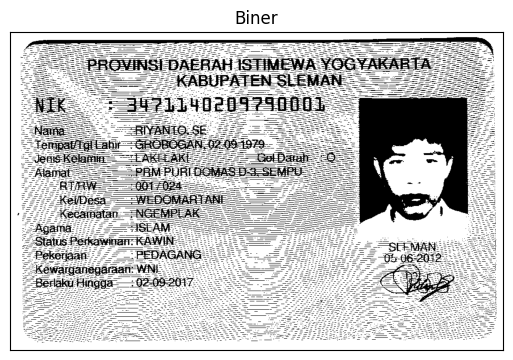

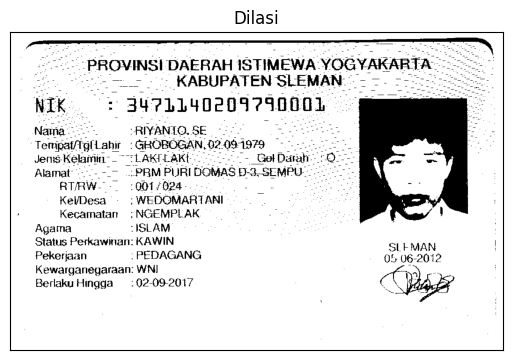

In [ ]:
import cv2
import numpy as np

img = cv2.imread('/content/drive/MyDrive/PCVK/ktp/ktp.png')
gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
_, binary = cv2.threshold(gray, 0, 255, cv2.THRESH_BINARY + cv2.THRESH_OTSU)
kernel = np.ones((2,1),np.uint8)
dilasi = cv2.dilate(binary,kernel,iterations = 1)

plt.figure(figsize=(14,6))
plt.subplot(121)
plt.imshow(binary, cmap='gray')
plt.title('Biner')
plt.xticks([]), plt.yticks([])
plt.show()

plt.figure(figsize=(14,6))
plt.subplot(122)
plt.imshow(dilasi, cmap='gray')
plt.title('Dilasi')
plt.xticks([]), plt.yticks([])
plt.show()